## Support Vector Regressor Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import make_regression

In [9]:
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)
##Creates the independent and dependent feature

In [10]:
X

array([[ 1.58565234,  1.08627774],
       [ 0.15280152,  0.48321351],
       [-0.53516999, -0.49888563],
       ...,
       [ 0.02659351,  0.46275709],
       [ 0.4503206 ,  1.24286948],
       [ 0.8194687 , -1.55351938]])

In [11]:
y

array([ 1.50495791e+02,  5.34438924e+01, -6.77629635e+01, -1.12706048e+02,
       -9.32552960e+01, -8.19764154e+01, -1.39130835e+02, -1.82528405e+02,
        1.15095793e+02,  5.62008537e+01, -1.79662145e+01, -3.04498068e+01,
        1.12922234e+02,  3.77344275e+01,  4.41679020e-01, -5.63160248e+01,
        1.51376745e+02, -7.17009999e+01,  4.74970584e+00, -1.18878101e+02,
       -8.34434834e+00,  6.60906085e+01, -1.56736654e+02, -7.26948132e+00,
        4.37120716e+01, -1.20651450e+01,  4.48403914e+01, -4.10425803e+01,
        5.22929795e+01, -1.89954750e+01,  3.23859919e+00,  6.73381367e+01,
        9.59101262e+00, -1.28905692e+02,  7.65499007e+01, -1.36261908e+01,
        4.63601612e+01,  6.26632195e+01,  4.02995263e+00,  1.44654734e+02,
        5.45548218e+01, -3.30638265e+00,  2.12022567e+01, -1.04410095e+02,
        1.13350605e+02, -5.78453244e+01, -3.17362296e+01,  4.81432973e+01,
       -2.07302069e+02, -6.28450036e+01,  6.42187608e-01, -7.77804104e+01,
       -4.23180434e+01, -

In [12]:
pd.DataFrame(X)[0]

0      1.585652
1      0.152802
2     -0.535170
3     -1.336171
4     -2.195405
         ...   
995    1.537760
996    0.470437
997    0.026594
998    0.450321
999    0.819469
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

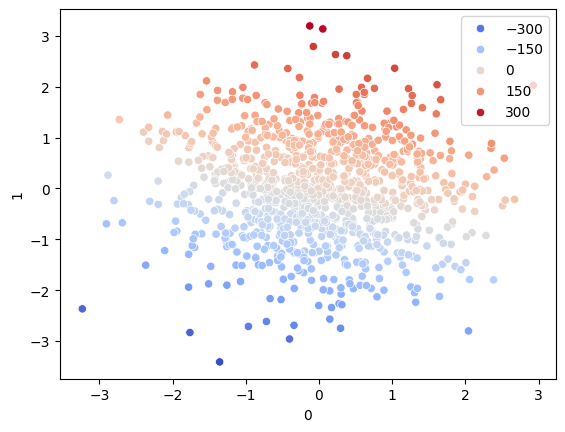

In [13]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y, palette='coolwarm')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [15]:
from sklearn.svm import SVR

In [16]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)  ## creating the best fit line

In [17]:
svr.fit(X_train, y_train)  ## fitting the model

SVR(kernel='linear')

In [18]:
svr.coef_

array([[28.16721415, 97.14193463]])

In [19]:
y_pred = svr.predict(X_test)  ## predicting the values

In [20]:
y_pred

array([  64.20866907, -120.5494109 ,   17.64252345,  -81.40160466,
        -62.70002751,   40.23609115,  -34.78674957,  -99.50286727,
        -30.13314859, -125.13689145,  -82.98635519,  -91.0510212 ,
        -94.64719261,  -38.22391471,   31.30304486,   51.18356767,
        104.0263205 ,   40.38161947,   -1.08547692,   21.07025146,
        -92.42944868,  -56.14029604,   46.42711945,   -4.75764707,
         84.48273105,  152.29809938,  -60.20920578,  -15.04776993,
       -124.46428575,  -56.60504567,    6.82715815,   80.68848416,
        123.87862034,  -82.10454969,  -22.36102562,  209.44469701,
        -52.02572223,   65.49322693,   30.99129913, -156.62584513,
         54.12255294,   45.12651686,  105.86944638,    7.15396899,
        -59.72692888,  -80.92124358,  213.29606474,  -52.44397613,
         83.55084899,  158.83121653,  -40.22573014,  -27.82201036,
       -369.59899794,   39.3780697 ,  -40.04708036,  -84.12854339,
        164.33364958,  -25.70598878,  140.09997185, -160.52397

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
print(r2_score(y_test, y_pred))  ## calculating the r2 score

0.999145929146566


### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

#Parameters:
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1.0, 10.0 , 100.0],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma' : [1,0,1,10,100,1000]
}

In [25]:
grid = GridSearchCV(SVR(), param_grid = param_grid, cv=5,verbose=3, refit=True)

In [26]:
grid.fit(X_train, y_train)  ## fitting the model with grid search   

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.691 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.689 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0, kernel=linear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0, kernel=linear;, score=0.691 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0, kernel=linear;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0, kernel=linear;, score=0.689 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamm

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0],
                         'epsilon': [0.01, 0.1, 0.2],
                         'gamma': [1, 0, 1, 10, 100, 1000],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
grid.best_params_  ## getting the best parameters

{'C': 100.0, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
## Prediction with the best parameters
y_pred_new = grid.predict(X_test)
print(r2_score(y_test, y_pred_new))  ## calculating the r2 score with new parameters

0.9991717051880977


In [29]:
y_pred_new

array([ 6.46562537e+01, -1.20957095e+02,  1.78295798e+01, -8.16715886e+01,
       -6.30079272e+01,  4.03920778e+01, -3.48327662e+01, -9.97508719e+01,
       -3.01834023e+01, -1.25597307e+02, -8.33531360e+01, -9.14739864e+01,
       -9.49172988e+01, -3.82949612e+01,  3.15511800e+01,  5.13437163e+01,
        1.04532732e+02,  4.08029379e+01, -9.82242728e-01,  2.13400048e+01,
       -9.26375380e+01, -5.62965033e+01,  4.67056491e+01, -4.73112706e+00,
        8.49601488e+01,  1.53118660e+02, -6.03598712e+01, -1.50114536e+01,
       -1.24864303e+02, -5.66940726e+01,  6.97874976e+00,  8.11081158e+01,
        1.24606004e+02, -8.23459518e+01, -2.23566921e+01,  2.10526290e+02,
       -5.21299578e+01,  6.59269531e+01,  3.12364746e+01, -1.57218889e+02,
        5.44484239e+01,  4.52781575e+01,  1.06389267e+02,  7.17023703e+00,
       -5.98291621e+01, -8.11820268e+01,  2.14447137e+02, -5.25737085e+01,
        8.40065779e+01,  1.59721822e+02, -4.03073309e+01, -2.77597454e+01,
       -3.71230838e+02,  